# Import

Here you can find the main imports to let the code run.
If you don't want to run all of them at the same time, at the beginning of each step algorithm are listed the necessary imports for the specific execution.

In [29]:
from Project_Code.step2.GreedyLearner import *
from Project_Code.step3.Ucb import *
from Project_Code.step3.Ucb import Ucb as Ucb3
from Project_Code.step3.TS import *
from Project_Code.step3.TS import TS as TS3
from Project_Code.step4.UcbStep4 import *
from Project_Code.step4.UcbStep4 import Ucb as Ucb4
from Project_Code.step4.TSstep4 import *
from Project_Code.step4.TSstep4 import TS as TS4
from Project_Code.step5.UcbStep5 import *
from Project_Code.step5.UcbStep5 import Ucb as Ucb5
from Project_Code.step5.TSstep5 import *
from Project_Code.step5.TSstep5 import TS as TS5
from Project_Code.step6.Ucb_Sliding_window import *
from Project_Code.step6.Ucb_Sliding_window import *
from Project_Code.step6.Ucb_Change_detection import *
from Project_Code.step7.ContextGenerator import ContextGenerator
from Project_Code.step7.ContextNode import ContextNode
from Project_Code.step7.ContextualLearner import ContextualLearner
from Project_Code.step7.UcbStep7 import Ucb
from Project_Code.step7.TSstep7 import TS
from Project_Code import json
import numpy as np
import matplotlib.pyplot as plt
from Project_Code.step3.Ucb import Ucb as Ucb3
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.Pricing.pricing_environment import *
from Project_Code.step6.Non_stationary_environment import *

We've developed a file called "Settings.py" where you can find all the relevant variables involved in the creation of the plots.
* NUM_OF_DAYS: it represents the x-length of the plot, the number of days we use for learning the best arms
* DAILY_INTERACTIONS: it represents the number of user interaction per day during which we do not update the arms but we just observe the rewards, increasing it lead to discover quicker the best arms
* NUM_PLOT_ITERATION: it represents the number of time we restart the entire algorithm from scratch, increasing it lead to consider more samples and so finding more reliable values

We suggest to use different values in STEP 6 as the environment is no more static and so requires more data.

# Settings

In [3]:
Settings.NUM_OF_DAYS = 100

Settings.DAILY_INTERACTIONS = 500

Settings.NUM_PLOT_ITERATION = 5

# Step 2

## Greedy Learner

In [4]:
from Project_Code.step2.GreedyLearner import *
from Project_Code.step2.GreedyLearner import Greedy_Learner
from Project_Code.Social_Influence.Graph import *
from Project_Code.Pricing.pricing_environment import *
from Project_Code.Pricing.user_data_generator import *

In [5]:
graph_sample = Graph(mode="full", weights=True)
env = EnvironmentPricing(4, graph_sample, 1)
greedy_learner = Greedy_Learner(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                         graph_sample, env.alpha_ratios)
greedy_learner.update()
#print(learner.current_reward)
print('\nFINAL')
print('Greedy algorithm chosen arms: ',greedy_learner.max_idxs)
print('Clearvoyant best arms: [[0, 1, 2, 2, 3], [0, 2, 1, 0, 2], [1, 3, 1, 1, 1]]')
print('Average reward with greedy algorithm choices: ', greedy_learner.revenue_given_arms(greedy_learner.max_idxs[0],0),
      greedy_learner.revenue_given_arms(greedy_learner.max_idxs[1],1), greedy_learner.revenue_given_arms(greedy_learner.max_idxs[2],2))
print('Average reward with best arms: ', greedy_learner.revenue_given_arms([0, 1, 2, 2, 3],0),
      greedy_learner.revenue_given_arms([0, 2, 1, 0, 2],1), greedy_learner.revenue_given_arms([1, 3, 1, 1, 1],2))
print('Average regret per iteration: ', greedy_learner.revenue_given_arms([0, 1, 2, 2, 3],0) - greedy_learner.revenue_given_arms(greedy_learner.max_idxs[0],0),
      greedy_learner.revenue_given_arms([0, 2, 1, 0, 2], 1) - greedy_learner.revenue_given_arms(greedy_learner.max_idxs[1],1),
      greedy_learner.revenue_given_arms([1, 3, 1, 1, 1], 2) - greedy_learner.revenue_given_arms(greedy_learner.max_idxs[2],2))


[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[69.2570315934066, 77.10165432692308, 57.24679842032967]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0]]
[69.2570315934066, 77.10165432692308, 71.81685156593406]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 1, 0, 0]]
[69.2570315934066, 77.10165432692308, 88.18933374450548]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 1, 0, 1]]
[69.2570315934066, 77.10165432692308, 103.12641431868131]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 1, 1, 1]]
[69.2570315934066, 77.10165432692308, 106.62542335920328]
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 1, 1, 1]]
[69.2570315934066, 77.10165432692308, 106.62542335920328]
[[0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [1, 0, 1, 1, 1]]
[69.2570315934066, 89.04497126098902, 106.62542335920328]
[[0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [1, 0, 1, 1, 1]]
[91.99306483516483, 89.04497126098902, 106.62542335920328]
[[0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [1, 0, 1, 1, 1]]
[91.99306483516483, 89.04497126098902, 106.62542335920328]
[[0, 1, 0, 

# Step3

## UCB-3

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from Project_Code.step3.Ucb import Ucb as Ucb3
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.Pricing.pricing_environment import *

[0 0 0 0 0]
[1 1 1 1 1]
[2 2 2 2 2]
[3 3 3 3 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 0 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 0 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 1 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1

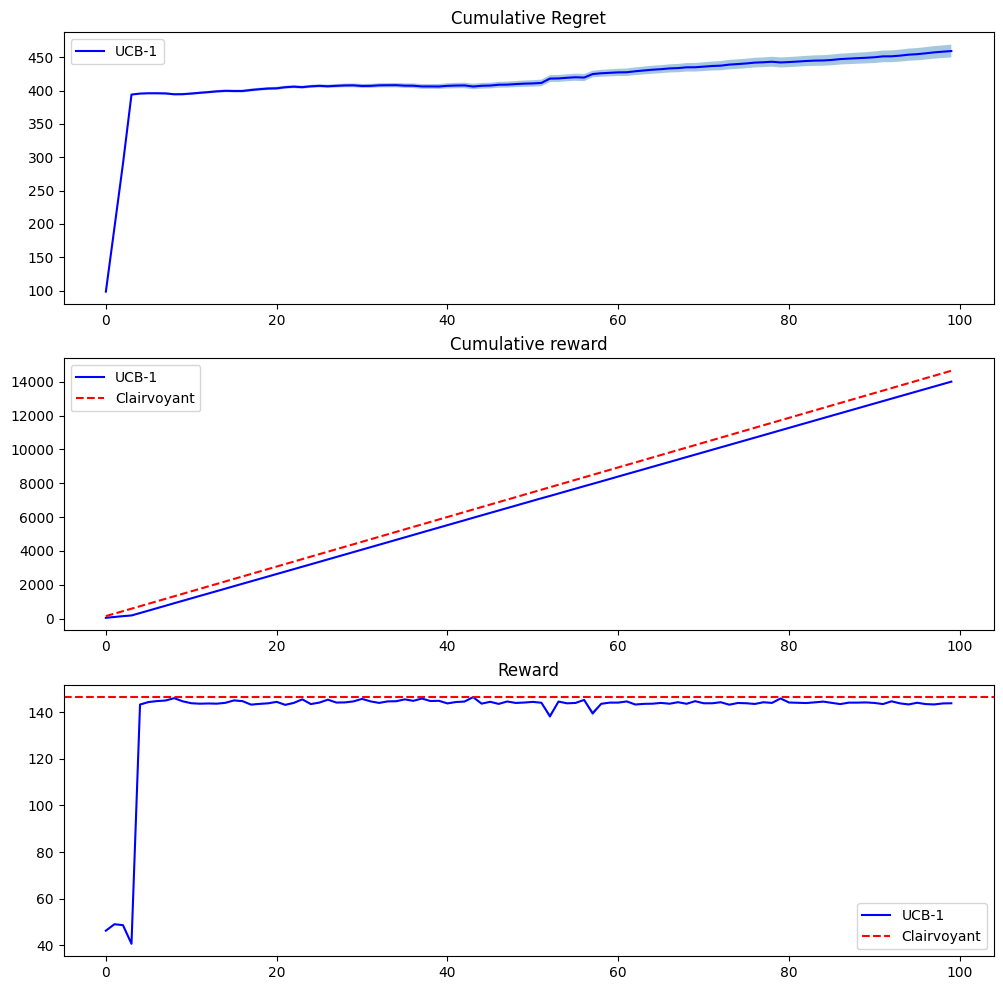

In [7]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = Ucb3(4, env.prices, env.secondaries, env.num_product_sold[0], graph, env.alpha_ratios[0][1:])
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, a = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB-1')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB-1')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB-1')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## TS-3

In [8]:
from Project_Code.step3.TS import TS as TS3
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.Pricing.pricing_environment import *
import matplotlib.pyplot as plt

[3, 0, 1, 0, 0]
[1, 3, 2, 2, 1]
[2, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 1, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 0, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2

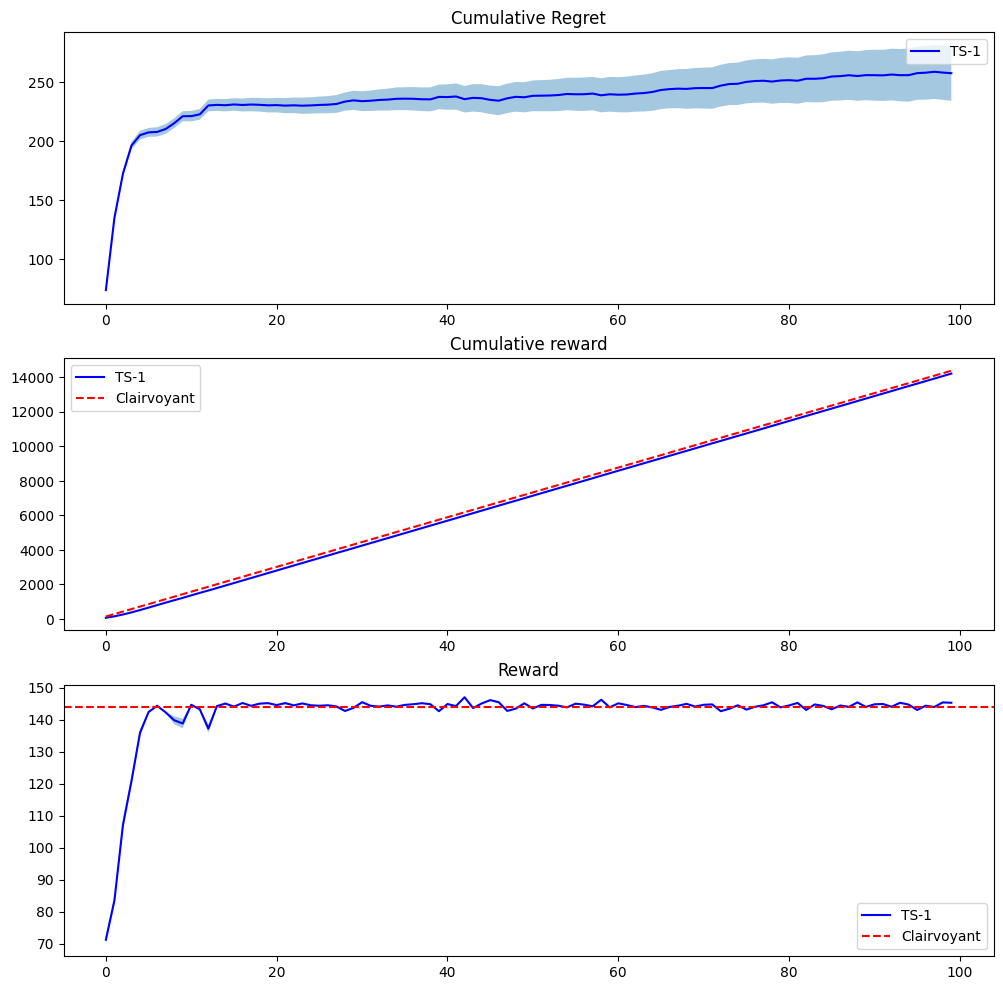

In [9]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = TS3(4, env.prices, env.secondaries, env.num_product_sold[0], graph,env.alpha_ratios[0][1:])
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, a = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='TS-1')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='TS-1')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='TS-1')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Step 4

## UCB-4

In [10]:
from Project_Code.step4.UcbStep4 import *
from Project_Code.step4.UcbStep4 import Ucb as Ucb4
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.Pricing.pricing_environment import *
import matplotlib.pyplot as plt

[0 0 0 0 0]
[1 1 1 1 1]
[2 2 2 2 2]
[3 3 3 3 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 0 2 3]
[0 1 2 1 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1

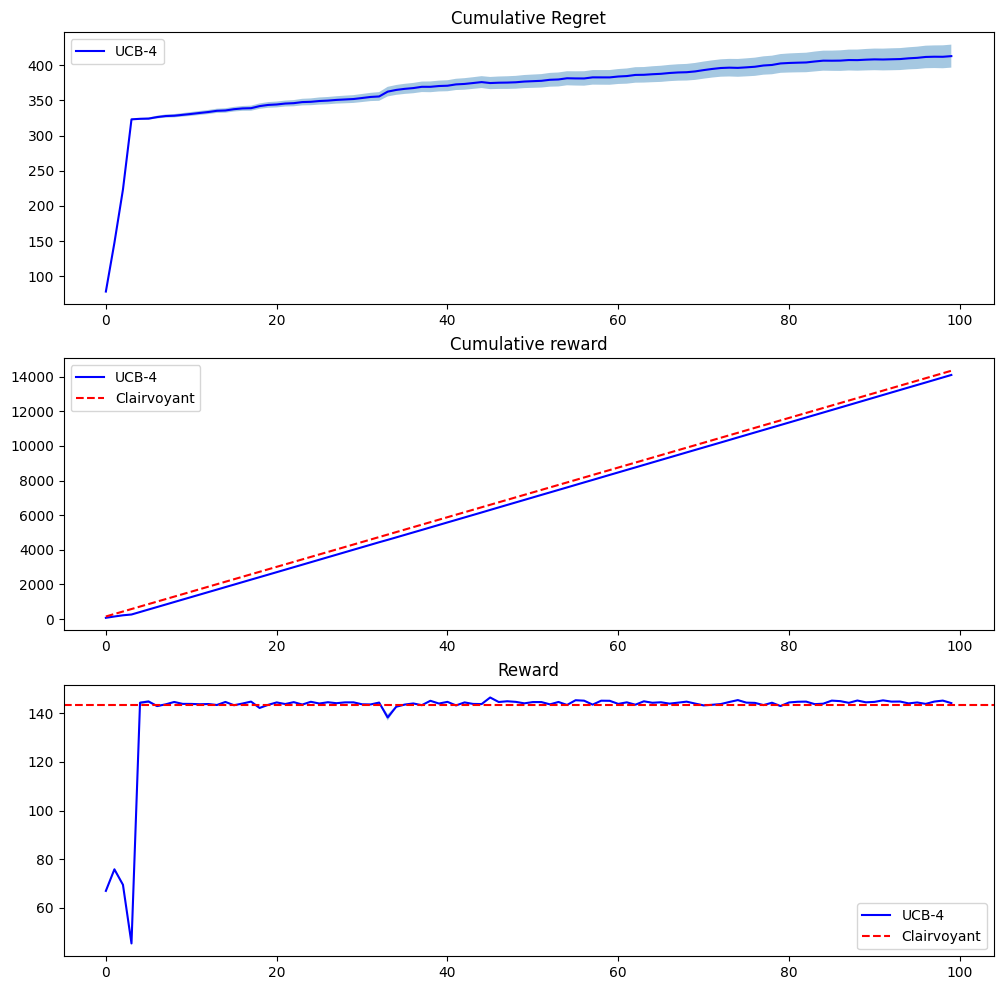

In [11]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = Ucb4(4, env.prices, env.secondaries, graph)
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(pulled_arms))
        opt_rew.append(best_revenue)

    a = learner.revenue_given_arms(pulled_arms)
    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB-4')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB-4')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB-4')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## TS-4

In [12]:
from Project_Code.step4.TSstep4 import *
from Project_Code.step4.TSstep4 import TS as TS4
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.Pricing.pricing_environment import *
import matplotlib.pyplot as plt

144.31108346153846
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1

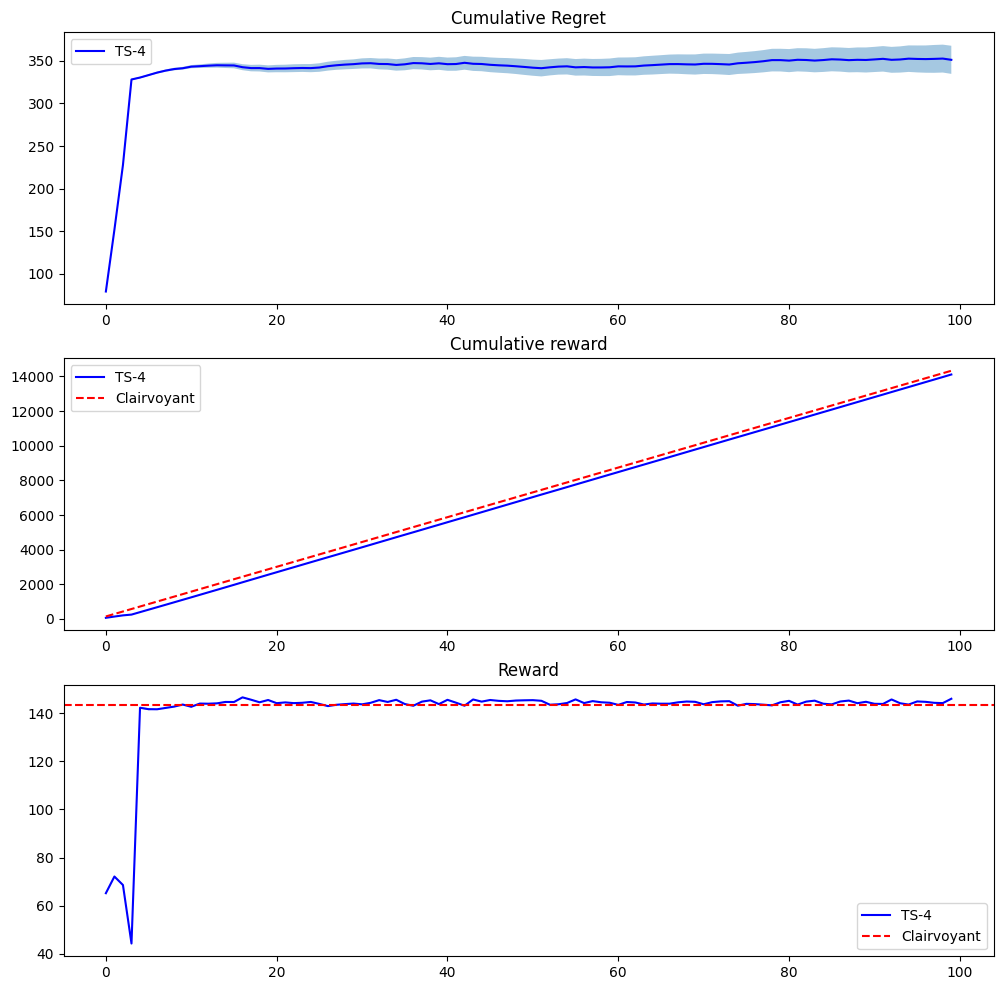

In [13]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = TS4(4, env.prices, env.secondaries, graph)
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    print(best_revenue)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew

print(learner.beta_parameters)

#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='TS-4')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='TS-4')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='TS-4')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Step5

## UCB-5

In [14]:
from Project_Code.step5.UcbStep5 import *
from Project_Code.step5.UcbStep5 import Ucb as Ucb5
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.Pricing.pricing_environment import *
import matplotlib.pyplot as plt

[0 0 0 0 0]
[1 1 1 1 1]
[2 2 2 2 2]
[3 3 3 3 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 1 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1

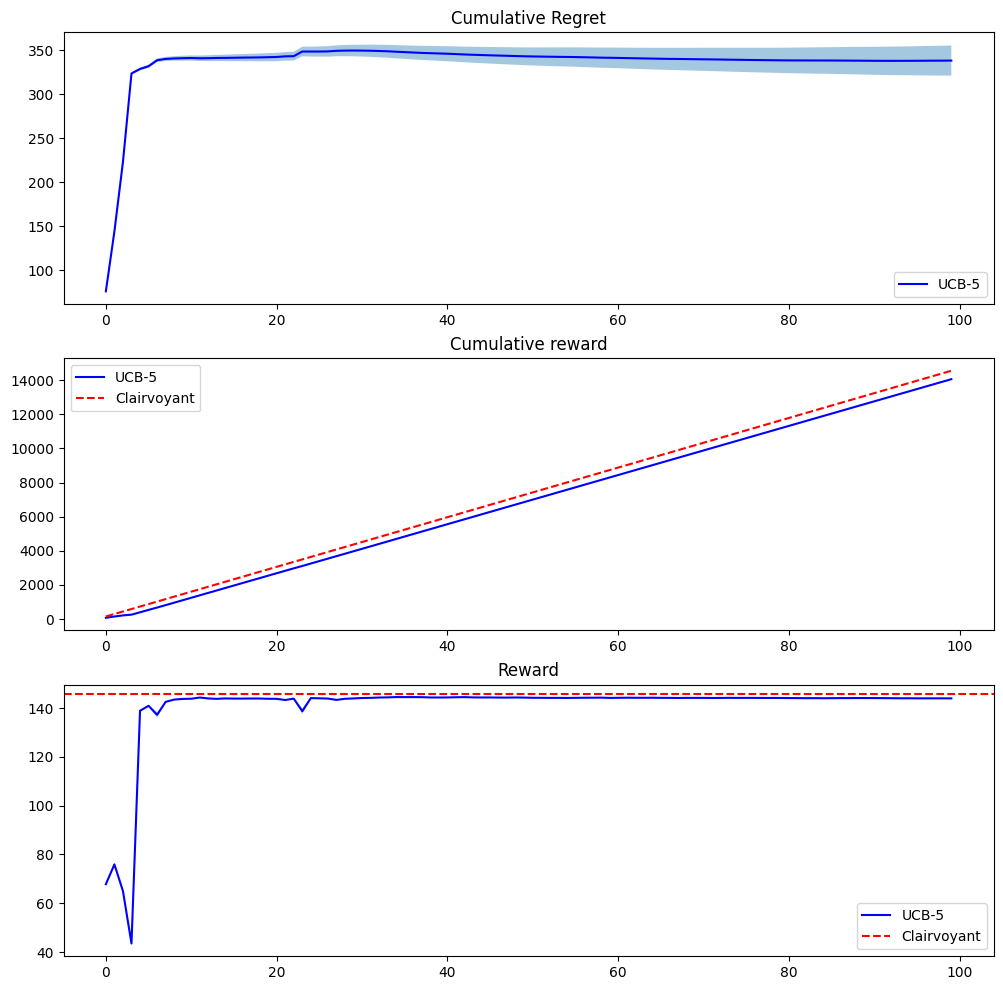

In [15]:

final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = Ucb5(4, env.prices, env.secondaries)
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB-5')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB-5')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB-5')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## TS-5

In [16]:
from Project_Code.step5.TSstep5 import *
from Project_Code.step5.TSstep5 import TS as TS5
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.Pricing.pricing_environment import *
import matplotlib.pyplot as plt

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2, 2, 3]
[0, 1, 2

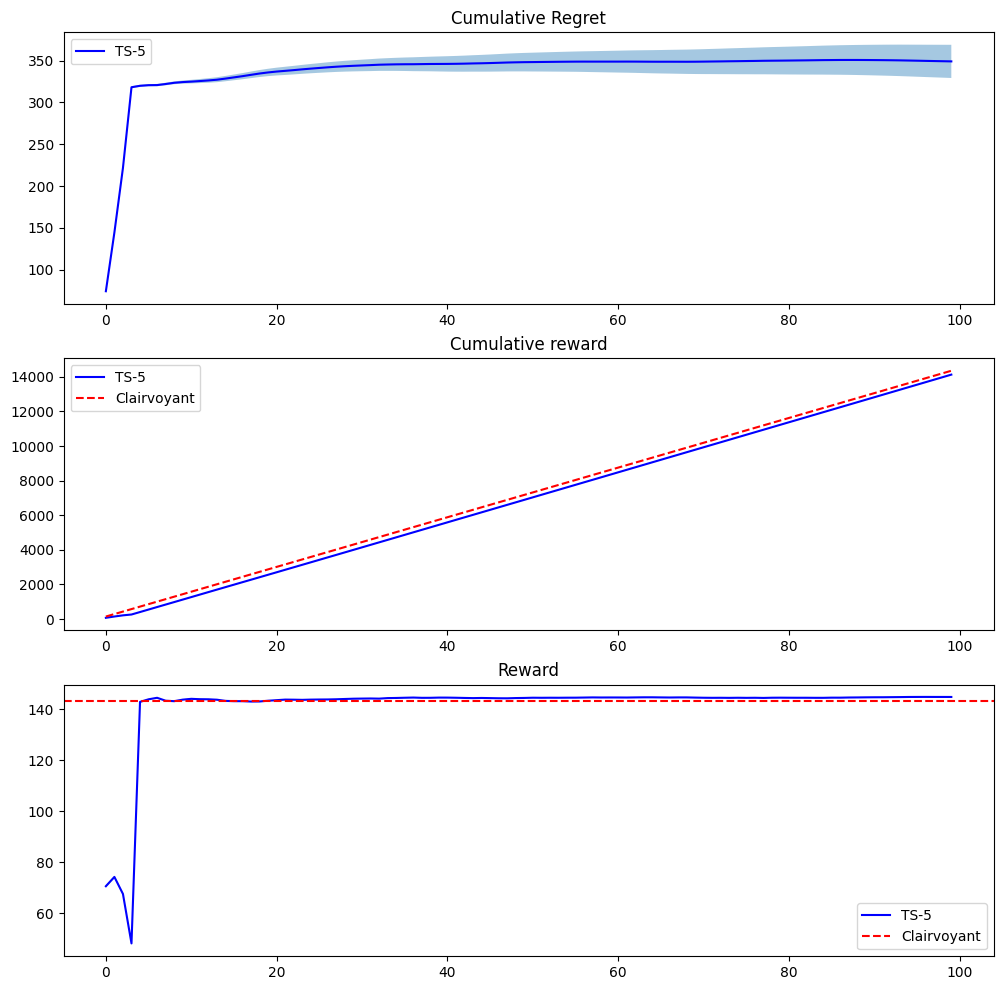

In [17]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    learner = TS5(4, env.prices, env.secondaries)
    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold,
                              graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    opt_rew = []
    actual_rew = []
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)



best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]


fig, ax = fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='TS-5')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='TS-5')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='red', linestyle='--', label='Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='TS-5')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='red', linestyle='--', label='Clairvoyant')
ax[2].set_title('Reward')


ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Step6

We suggest the use of the following parameters to have a good-looking result:


In [18]:
from Project_Code import Settings as Settings

Settings.NUM_OF_DAYS = 500

Settings.DAY_OF_ABRUPT_CHANGE = int(Settings.NUM_OF_DAYS/2)

Settings.WINDOW_SIZE = int(np.sqrt(Settings.NUM_OF_DAYS))

Settings.DAILY_INTERACTIONS = 70

Settings.NUM_PLOT_ITERATION = 5

The environment is no more static, so we set new conversion rates that will substitute the previous run at a certain point of the simulation

In [19]:
new_conv_rates=[
    [
      [0.7, 0.47, 0.45, 0.2],
      [0.35, 0.3, 0.8, 0.25],
      [0.45, 0.8, 0.4, 0.4],
      [0.7, 0.35, 0.32, 0.25],
      [0.5, 0.55, 0.85, 0.52] ],

    [ [0.9, 0.45, 0.4, 0.35],
      [0.4, 0.8, 0.3, 0.25],
      [0.5, 0.45, 0.9, 0.35],
      [0.4, 0.35, 0.8, 0.3],
      [0.5, 0.45, 0.4, 0.9] ],
    [
      [0.25, 0.79, 0.4, 0.3],
      [0.45, 0.4, 0.35, 0.95],
      [0.55, 0.85, 0.5, 0.45],
      [0.4, 0.82, 0.32, 0.25],
      [0.4, 0.95, 0.35, 0.3]]
  ]

## Sliding Window

In [20]:
from Project_Code.step6.Ucb_Sliding_window import *
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.step6.Non_stationary_environment import *
import matplotlib.pyplot as plt

[3 3 3 3 3]
[2 2 2 2 2]
[1 1 1 1 1]
[0 0 0 0 0]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1

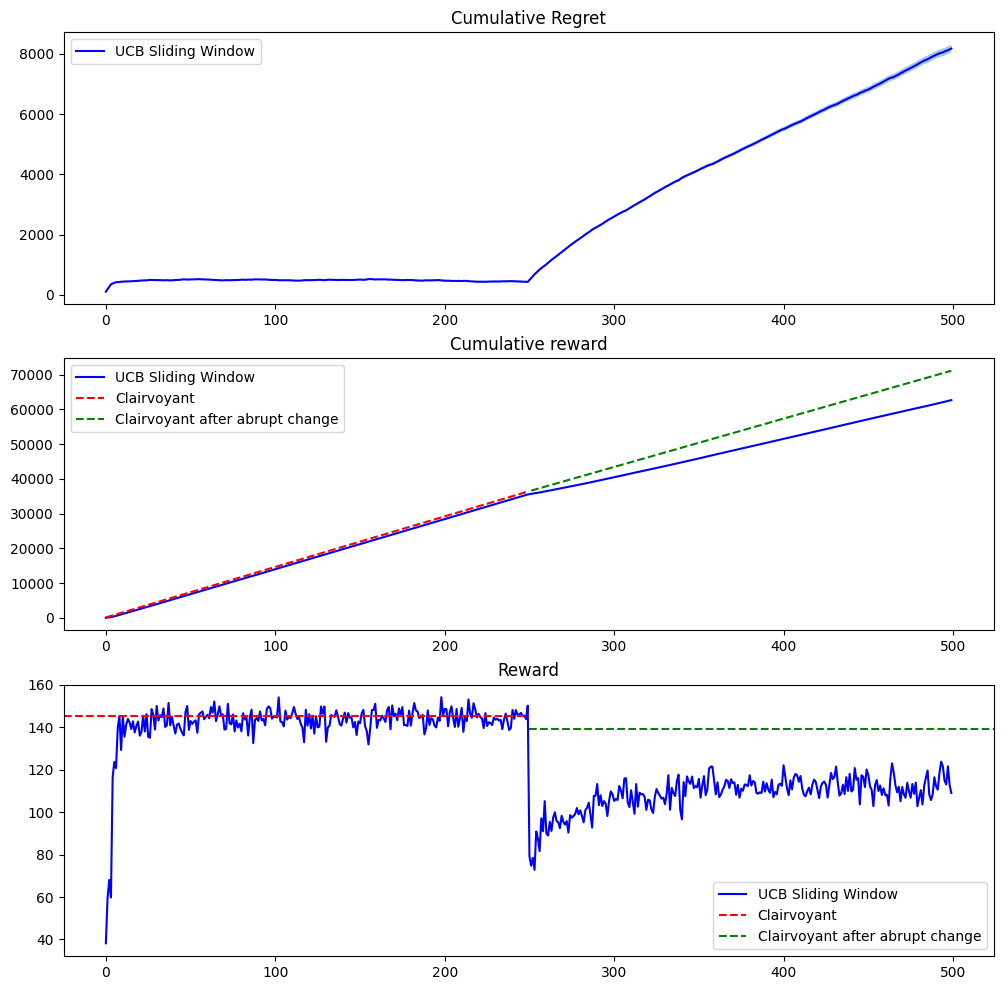

In [21]:

final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = Non_stationary_environment(4, graph, 1)
    learner = UCB_Sliding_Window(4, env.prices)

    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    clairvoyant_after_change = Clairvoyant(env.prices, new_conv_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    best_revenue_after_change = clairvoyant_after_change.revenue_given_arms([0, 2, 1, 0, 2], 0)
    best_revenue_array = [best_revenue for i in range(Settings.DAY_OF_ABRUPT_CHANGE)] + [best_revenue_after_change for i in range(Settings.DAY_OF_ABRUPT_CHANGE)]
    opt_rew = []
    actual_rew = []
    best_rew = best_revenue
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        if i==Settings.DAY_OF_ABRUPT_CHANGE:
            env.setNewConvRates(new_conv_rates)
            print("Cambio")
            best_rew=best_revenue_after_change
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_rew)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)

#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB Sliding Window')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB Sliding Window')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array)[:Settings.DAY_OF_ABRUPT_CHANGE], color='red', linestyle='--', label='Clairvoyant')
xx = [i for i in range(Settings.DAY_OF_ABRUPT_CHANGE+1,Settings.NUM_OF_DAYS)]
ax[1].plot(xx, np.cumsum(best_revenue_array)[Settings.DAY_OF_ABRUPT_CHANGE+1:],
           color='green', linestyle='--', label='Clairvoyant after abrupt change')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB Sliding Window')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, xmin=0., xmax=Settings.DAY_OF_ABRUPT_CHANGE/Settings.NUM_OF_DAYS,
              color='red', linestyle='--', label='Clairvoyant')
ax[2].axhline(y=best_revenue_after_change, xmin=Settings.DAY_OF_ABRUPT_CHANGE/Settings.NUM_OF_DAYS, xmax=1.,
              color='green', linestyle='--', label='Clairvoyant after abrupt change')
ax[2].set_title('Reward')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## Change Detection

In [22]:
from Project_Code.step6.Ucb_Change_detection import *
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.step6.Non_stationary_environment import *
import matplotlib.pyplot as plt

[0 0 0 0 0]
[1 1 1 1 1]
[2 2 2 2 2]
[3 3 3 3 3]
[0 1 2 2 3]
[0 1 0 0 3]
[0 1 2 2 3]
[0 1 2 0 3]
[0 1 2 0 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[1 1 2 0 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 2]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 0 2 3]
[0 1 2 2 0]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 0 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 1 2 3]
[0 1 1 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[3 0 1 0 3]
[0 1 1 2 1]
[0 1 2 2 1]
[0 1 0 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1 2 2 3]
[0 1

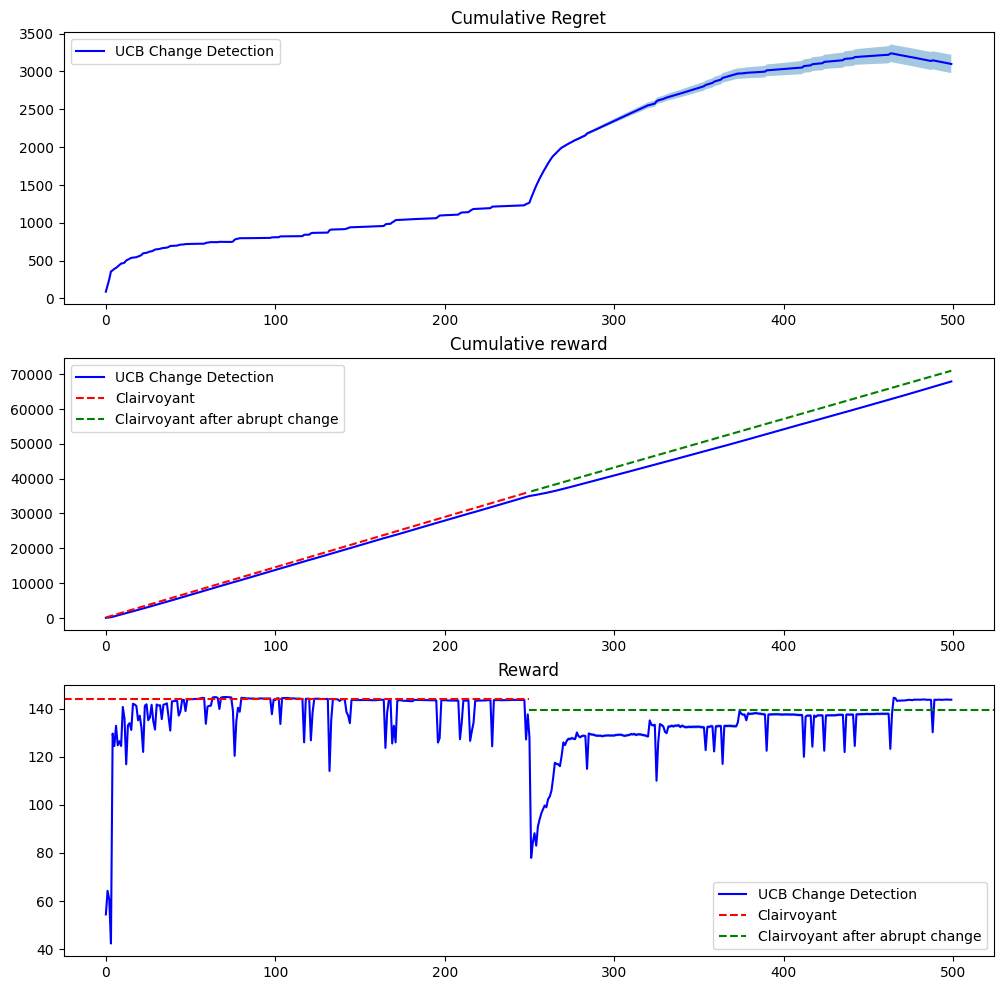

In [23]:
final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):
    graph = Graph(mode="full", weights=True)
    env = Non_stationary_environment(4, graph, 1)
    learner = Ucb_Change_detection(4, env.prices,env.secondaries)

    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    clairvoyant_after_change = Clairvoyant(env.prices, new_conv_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms([0, 1, 2, 2, 3], 0)
    best_revenue_after_change = clairvoyant_after_change.revenue_given_arms([0, 2, 1, 0, 2], 0)
    best_revenue_array = [best_revenue for i in range(Settings.DAY_OF_ABRUPT_CHANGE)] + [best_revenue_after_change for i in range(Settings.DAY_OF_ABRUPT_CHANGE)]
    opt_rew = []
    actual_rew = []
    best_rew = best_revenue
    for i in range(Settings.NUM_OF_DAYS):
        pulled_arms = learner.act()
        print(pulled_arms)
        if i==Settings.DAY_OF_ABRUPT_CHANGE:
            env.setNewConvRates(new_conv_rates)
            print("Cambio")
            best_rew=best_revenue_after_change
        for j in range(Settings.DAILY_INTERACTIONS):
            visited_products, num_bought_products, num_primary = env.round(pulled_arms)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)

        learner.update(pulled_arms)
        actual_rew.append(learner.revenue_given_arms(arms=pulled_arms))
        opt_rew.append(best_rew)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k,:] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUM REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret= np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_regret)

#Cumulative REWARD
print("FINAL CUM REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward= np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#AREWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward= np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(12,12))
ax[0].plot(mean_cumulative_regret, color='blue', label='UCB Change Detection')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret,mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color='blue', label='UCB Change Detection')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array)[:Settings.DAY_OF_ABRUPT_CHANGE], color='red', linestyle='--', label='Clairvoyant')
xx = [i for i in range(Settings.DAY_OF_ABRUPT_CHANGE+1,Settings.NUM_OF_DAYS)]
ax[1].plot(xx, np.cumsum(best_revenue_array)[Settings.DAY_OF_ABRUPT_CHANGE+1:],
           color='green', linestyle='--', label='Clairvoyant after abrupt change')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color='blue', label='UCB Change Detection')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, xmin=0., xmax=Settings.DAY_OF_ABRUPT_CHANGE/Settings.NUM_OF_DAYS,
              color='red', linestyle='--', label='Clairvoyant')
ax[2].axhline(y=best_revenue_after_change, xmin=Settings.DAY_OF_ABRUPT_CHANGE/Settings.NUM_OF_DAYS, xmax=1.,
              color='green', linestyle='--', label='Clairvoyant after abrupt change')
ax[2].set_title('Reward')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Step 7

Necessary imports for Step 7 to properly work are:

In [24]:
from Project_Code.step7.ContextGenerator import ContextGenerator
from Project_Code.step7.ContextNode import ContextNode
from Project_Code.step7.ContextualLearner import ContextualLearner
from Project_Code.step7.UcbStep7 import Ucb
from Project_Code.step7.TSstep7 import TS
from Project_Code.Pricing.Clairvoyant import *
from Project_Code import Settings as Settings
from Project_Code.Social_Influence.Graph import *
from Project_Code.Pricing.pricing_environment import *
import matplotlib.pyplot as plt


## Context Generation with Context-UCB1

We suggest the use of the following parameters to have a good-looking result:

In [25]:
Settings.NUM_PLOT_ITERATION = 20
Settings.NUM_OF_DAYS = 90
Settings.DAILY_INTERACTIONS = 100

Then, the code that regulates the execution is:

Execution 1: day 0
Execution 1: day 1
Execution 1: day 2
Execution 1: day 3
Execution 1: day 4
Execution 1: day 5
Execution 1: day 6
Execution 1: day 7
Execution 1: day 8
Execution 1: day 9
Execution 1: day 10
Execution 1: day 11
Execution 1: day 12
Execution 1: day 13
Execution 1: day 14
AFTER SPLIT: 

[ {'feature-2': False} ]
[ {} ]
[ {'feature-2': True} ]
Execution 1: day 15
Execution 1: day 16
Execution 1: day 17
Execution 1: day 18
Execution 1: day 19
Execution 1: day 20
Execution 1: day 21
Execution 1: day 22
Execution 1: day 23
Execution 1: day 24
Execution 1: day 25
Execution 1: day 26
Execution 1: day 27
Execution 1: day 28
Execution 1: day 29
Execution 1: day 30
Execution 1: day 31
Execution 1: day 32
Execution 1: day 33
Execution 1: day 34
Execution 1: day 35
Execution 1: day 36
Execution 1: day 37
Execution 1: day 38
Execution 1: day 39
Execution 1: day 40
Execution 1: day 41
Execution 1: day 42
Execution 1: day 43
Execution 1: day 44
Execution 1: day 45
Execution 1: day 46

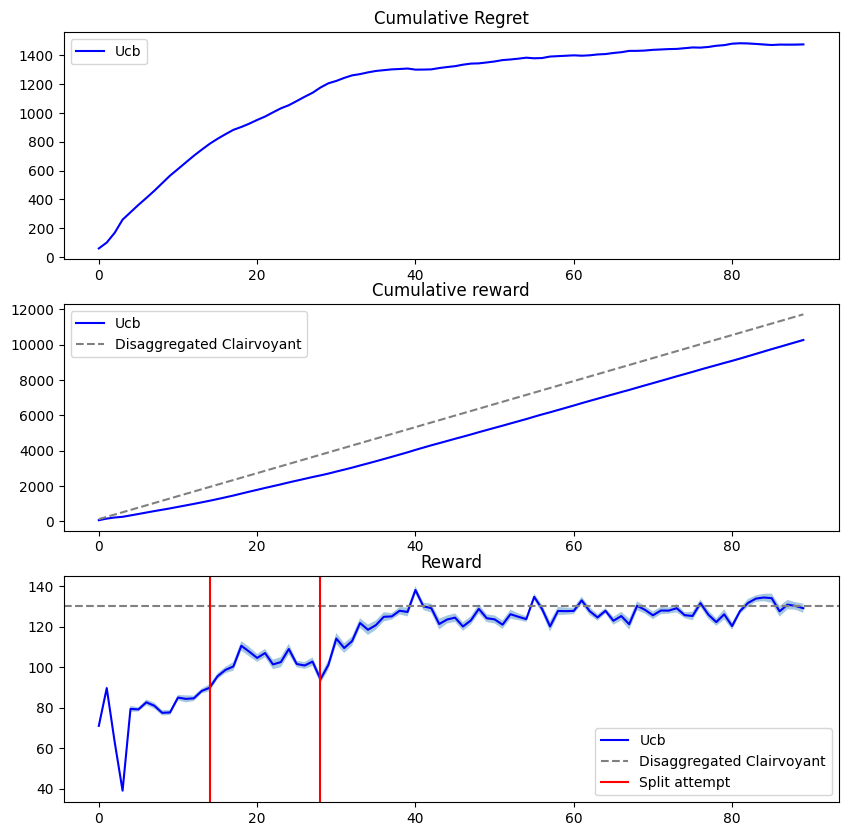

In [26]:
color = 'blue'

final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):

    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    context_learner = ContextualLearner(features=env.features, n_arms=env.n_arms, n_products=len(env.graph.nodes))

    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms(arms=[0, 1, 2, 2, 3], chosen_class=0)
    best_revenue_array = [best_revenue for _ in range(Settings.NUM_OF_DAYS)]

    # optimal arm for C1: [0, 1, 2, 2, 3]
    # optimal arm for C2: [0, 2, 1, 0, 2]
    # optimal arm for C3: [1, 3, 1, 1, 1]
    best_arms_per_class = [[0, 1, 2, 2, 3], [0, 2, 1, 0, 2], [1, 3, 1, 1, 1]]
    best_disaggr_revenue = clairvoyant.disaggr_revenue_given_arms(arms=best_arms_per_class, env=env)

    root_learner = Ucb(4, env.prices, env.secondaries, graph)

    root_node = ContextNode(features=env.features, base_learner=root_learner)
    context_learner.update_context_tree(root_node)

    # confidence used for lower bounds is hardcoded to 0.1!
    context_generator = ContextGenerator(features=env.features, contextual_learner=context_learner, confidence=0.1)

    best_revenue = clairvoyant.disaggr_revenue_given_arms(arms=best_arms_per_class, env=env)
    opt_rew = []
    actual_rew = []

    for i in range(Settings.NUM_OF_DAYS):

        print("Execution " + str(k+1) + ": day " + str(i))

        if i % 14 == 0 and i != 0:
            context_generator.context_generation()

        for j in range(Settings.DAILY_INTERACTIONS):

            customer = Customer(reservation_price=100, num_products=len(graph.nodes), graph=graph, env=env)

            learner = context_learner.get_learner_by_context(current_features=customer.features)

            pulled_arms = learner.act()

            visited_products, num_bought_products, num_primary = env.round(pulled_arms, customer)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)
            context_generator.collect_daily_data(pulled_arms=pulled_arms,
                                                 visited_products=visited_products,
                                                 num_bought_products=num_bought_products,
                                                 num_primaries=num_primary,
                                                 features=customer.features)
            customer.set_as_new()

        learner.update(pulled_arms)
        context_generator.update_average_rewards(current_features=customer.features)

        actual_rew.append(context_generator.average_rewards[-1])
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k, :] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUMULATIVE REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret = np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS*Settings.DAILY_INTERACTIONS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUMULATIVE REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward = np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#REWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward = np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)

best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
ax[0].plot(mean_cumulative_regret, color=color, label='Ucb')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret, mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color=color, label='Ucb')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='grey', linestyle='--', label='Disaggregated Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color=color, label='Ucb')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='grey', linestyle='--', label='Disaggregated Clairvoyant')
ax[2].axvline(x=14, color='red', label="Split attempt")
ax[2].axvline(x=28, color='red')
ax[2].set_title('Reward')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

## Context Generation with Context-TS

An appropriate choice of parameters in this case is the following:

In [27]:
Settings.NUM_PLOT_ITERATION = 20
Settings.NUM_OF_DAYS = 90
Settings.DAILY_INTERACTIONS = 220

and the execution code is the one below:

Execution 1: day 0
Execution 1: day 1
Execution 1: day 2
Execution 1: day 3
Execution 1: day 4
Execution 1: day 5
Execution 1: day 6
Execution 1: day 7
Execution 1: day 8
Execution 1: day 9
Execution 1: day 10
Execution 1: day 11
Execution 1: day 12
Execution 1: day 13
Execution 1: day 14
AFTER SPLIT: 

[ {'feature-2': False} ]
[ {} ]
[ {'feature-2': True} ]
Execution 1: day 15
Execution 1: day 16
Execution 1: day 17
Execution 1: day 18
Execution 1: day 19
Execution 1: day 20
Execution 1: day 21
Execution 1: day 22
Execution 1: day 23
Execution 1: day 24
Execution 1: day 25
Execution 1: day 26
Execution 1: day 27
Execution 1: day 28
AFTER SPLIT: 

[ {'feature-2': False} ]
[ {} ]
[ {'feature-2': True, 'feature-1': False} ]
[ {'feature-2': True} ]
[ {'feature-2': True, 'feature-1': True} ]
Execution 1: day 29
Execution 1: day 30
Execution 1: day 31
Execution 1: day 32
Execution 1: day 33
Execution 1: day 34
Execution 1: day 35
Execution 1: day 36
Execution 1: day 37
Execution 1: day 38
E

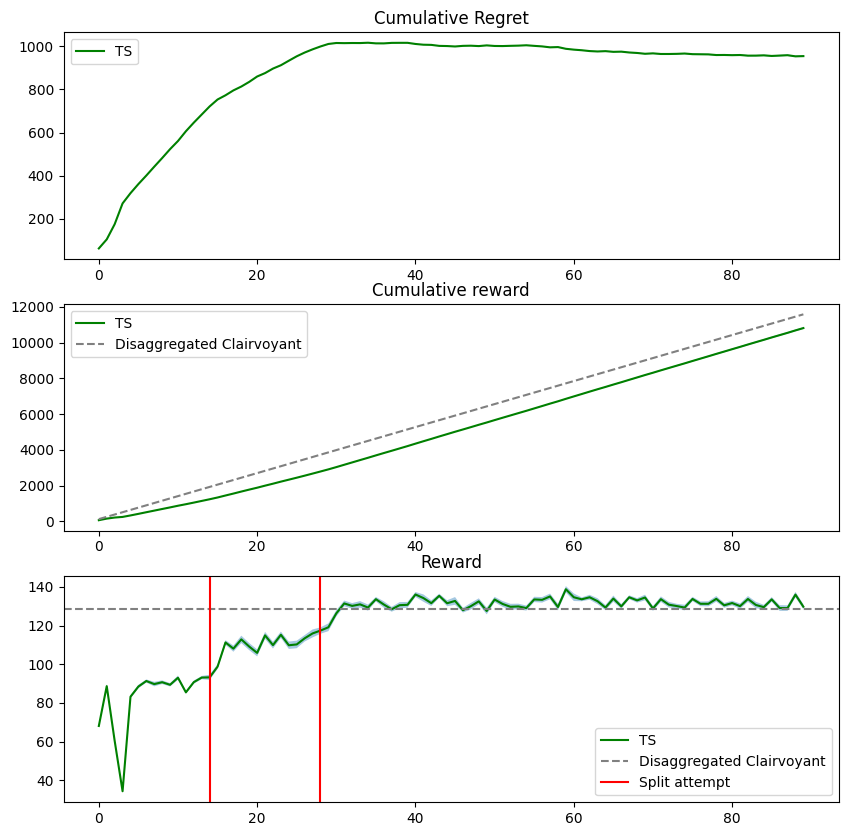

In [28]:
color = 'green'

final_reward= np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_regret = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))
final_cumulative_reward = np.zeros((Settings.NUM_PLOT_ITERATION, Settings.NUM_OF_DAYS))

for k in range (Settings.NUM_PLOT_ITERATION):

    graph = Graph(mode="full", weights=True)
    env = EnvironmentPricing(4, graph, 1)
    context_learner = ContextualLearner(features=env.features, n_arms=env.n_arms, n_products=len(env.graph.nodes))

    clairvoyant = Clairvoyant(env.prices, env.conversion_rates, env.classes, env.secondaries, env.num_product_sold, graph, env.alpha_ratios)
    best_revenue = clairvoyant.revenue_given_arms(arms=[0, 1, 2, 2, 3], chosen_class=0)
    best_revenue_array = [best_revenue for _ in range(Settings.NUM_OF_DAYS)]

    # optimal arm for C1: [0, 1, 2, 2, 3]
    # optimal arm for C2: [0, 2, 1, 0, 2]
    # optimal arm for C3: [1, 3, 1, 1, 1]
    best_arms_per_class = [[0, 1, 2, 2, 3], [0, 2, 1, 0, 2], [1, 3, 1, 1, 1]]
    best_disaggr_revenue = clairvoyant.disaggr_revenue_given_arms(arms=best_arms_per_class, env=env)

    root_learner = TS(4, env.prices, env.secondaries, graph)

    root_node = ContextNode(features=env.features, base_learner=root_learner)
    context_learner.update_context_tree(root_node)

    # confidence used for lower bounds is hardcoded to 0.1!
    context_generator = ContextGenerator(features=env.features, contextual_learner=context_learner, confidence=0.1)

    best_revenue = clairvoyant.disaggr_revenue_given_arms(arms=best_arms_per_class, env=env)
    opt_rew = []
    actual_rew = []

    for i in range(Settings.NUM_OF_DAYS):

        print("Execution " + str(k+1) + ": day " + str(i))

        if i % 14 == 0 and i != 0:
            context_generator.context_generation()

        for j in range(Settings.DAILY_INTERACTIONS):

            customer = Customer(reservation_price=100, num_products=len(graph.nodes), graph=graph, env=env)

            learner = context_learner.get_learner_by_context(current_features=customer.features)

            pulled_arms = learner.act()

            visited_products, num_bought_products, num_primary = env.round(pulled_arms, customer)
            learner.updateHistory(pulled_arms, visited_products, num_bought_products, num_primary)
            context_generator.collect_daily_data(pulled_arms=pulled_arms,
                                                 visited_products=visited_products,
                                                 num_bought_products=num_bought_products,
                                                 num_primaries=num_primary,
                                                 features=customer.features)
            customer.set_as_new()

        learner.update(pulled_arms)
        context_generator.update_average_rewards(current_features=customer.features)

        actual_rew.append(learner.average_reward[-1])
        opt_rew.append(best_revenue)

    final_cumulative_regret[k, :] = np.cumsum(opt_rew) - np.cumsum(actual_rew)
    final_cumulative_reward[k, :] = np.cumsum(actual_rew)
    final_reward[k:] = actual_rew


#REGRET
print("FINAL CUMULATIVE REGRET: ")
print(final_cumulative_regret)

mean_cumulative_regret = np.mean(final_cumulative_regret, axis=0)
stdev_regret = np.std(final_cumulative_regret, axis=0) / np.sqrt(Settings.NUM_OF_DAYS*Settings.DAILY_INTERACTIONS)
print("MEAN: ")
print(mean_cumulative_regret)


#Cumulative REWARD
print("FINAL CUMULATIVE REWARD: ")
print(final_cumulative_reward)

mean_cumulative_reward = np.mean(final_cumulative_reward, axis=0)
stdev_cumulative_reward = np.std(final_cumulative_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_cumulative_reward)

#REWARD
print("FINAL REWARD: ")
print(final_reward)

mean_final_reward = np.mean(final_reward, axis=0)
stdev_reward = np.std(final_reward, axis=0) / np.sqrt(Settings.NUM_OF_DAYS)
print("MEAN: ")
print(mean_final_reward)

best_revenue_array = [best_revenue for i in range(Settings.NUM_OF_DAYS)]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
ax[0].plot(mean_cumulative_regret, color=color, label='TS')
ax[0].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_regret - stdev_regret, mean_cumulative_regret + stdev_regret, alpha=0.4)
ax[0].set_title('Cumulative Regret')

ax[1].plot(mean_cumulative_reward, color=color, label='TS')
ax[1].fill_between(range(Settings.NUM_OF_DAYS), mean_cumulative_reward - stdev_cumulative_reward, mean_cumulative_reward + stdev_cumulative_reward, alpha=0.4)
ax[1].plot(np.cumsum(best_revenue_array), color='grey', linestyle='--', label='Disaggregated Clairvoyant')
ax[1].set_title('Cumulative reward')

ax[2].plot(mean_final_reward, color=color, label='TS')
ax[2].fill_between(range(Settings.NUM_OF_DAYS), mean_final_reward - stdev_reward, mean_final_reward + stdev_reward, alpha=0.4)
ax[2].axhline(y=best_revenue, color='grey', linestyle='--', label='Disaggregated Clairvoyant')
ax[2].axvline(x=14, color='red', label="Split attempt")
ax[2].axvline(x=28, color='red')
ax[2].set_title('Reward')

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()